## ***Assignment***

# ***Skin cancer detection***

---



---



**Skin cancer detection using deep learning is a technique that utilizes deep neural networks to classify skin lesions and detect the presence of skin cancer. The given dataset, HAM10000_metadata.csv, is likely a metadata file containing information about skin lesion images such as their labels, clinical attributes, and other relevant information.**

*Link of the dataset used : https://www.kaggle.com/datasets/kmader/skin-cancer-mnist-ham10000*

# Step 1 : Importing the required libraries , modules and dataset for the skin cancer detection project

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import glob
from tqdm import tqdm
from glob import glob
from PIL import Image

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import tensorflow as tf
import keras

In [5]:
cancer_data = pd.read_csv("HAM10000_metadata.csv")
cancer_data

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


# Step 2 :  Data Preprocessing

A) This code snippet creates a dictionary called image_path, where the keys are the filenames without the extension, and the values are the corresponding file paths. It uses a list comprehension and the glob function to find all the JPEG image files within the specified directory. The result is stored in the image_path variable.

In [6]:
image_path = {os.path.splitext(os.path.basename(x))[0]: x
              for x in glob(os.path.join("drive/MyDrive/data_ham10000/", '*', '*.jpg'))}
image_path

{'ISIC_0033322': 'drive/MyDrive/data_ham10000/HAM10000_images_part_2/ISIC_0033322.jpg',
 'ISIC_0033325': 'drive/MyDrive/data_ham10000/HAM10000_images_part_2/ISIC_0033325.jpg',
 'ISIC_0033332': 'drive/MyDrive/data_ham10000/HAM10000_images_part_2/ISIC_0033332.jpg',
 'ISIC_0033326': 'drive/MyDrive/data_ham10000/HAM10000_images_part_2/ISIC_0033326.jpg',
 'ISIC_0033320': 'drive/MyDrive/data_ham10000/HAM10000_images_part_2/ISIC_0033320.jpg',
 'ISIC_0033333': 'drive/MyDrive/data_ham10000/HAM10000_images_part_2/ISIC_0033333.jpg',
 'ISIC_0033327': 'drive/MyDrive/data_ham10000/HAM10000_images_part_2/ISIC_0033327.jpg',
 'ISIC_0033331': 'drive/MyDrive/data_ham10000/HAM10000_images_part_2/ISIC_0033331.jpg',
 'ISIC_0033323': 'drive/MyDrive/data_ham10000/HAM10000_images_part_2/ISIC_0033323.jpg',
 'ISIC_0033329': 'drive/MyDrive/data_ham10000/HAM10000_images_part_2/ISIC_0033329.jpg',
 'ISIC_0033334': 'drive/MyDrive/data_ham10000/HAM10000_images_part_2/ISIC_0033334.jpg',
 'ISIC_0033321': 'drive/MyDrive/

In [7]:
image_path.get

<function dict.get(key, default=None, /)>

In [8]:
cancer_data["dx"]

0          bkl
1          bkl
2          bkl
3          bkl
4          bkl
         ...  
10010    akiec
10011    akiec
10012    akiec
10013    akiec
10014      mel
Name: dx, Length: 10015, dtype: object

In [9]:
cancer_data["dx"].value_counts()

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64

B) The code below creates a new column in the cancer_data DataFrame called "Type of cells". It maps the values from the "dx" column to their corresponding descriptions using a dictionary. Each unique diagnosis is mapped to a specific cell type or lesion description.

In [10]:
cancer_data["Type of cells"] = cancer_data["dx"].map({'nv': 'Melanocytic nevi',
    'mel': 'dermatofibroma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'})

In [11]:
cancer_data["path"] = cancer_data["image_id"].map(image_path.get)

In [12]:
cancer_data["Cells Id"] = pd.Categorical(cancer_data["dx"]).codes

In [13]:
cancer_data

,lesion_id,image_id,dx,dx_type,age,sex,localization,Type of cells,path,Cells Id
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions,drive/MyDrive/data_ham10000/HAM10000_images_pa...,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions,drive/MyDrive/data_ham10000/HAM10000_images_pa...,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions,drive/MyDrive/data_ham10000/HAM10000_images_pa...,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions,drive/MyDrive/data_ham10000/HAM10000_images_pa...,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,Benign keratosis-like lesions,drive/MyDrive/data_ham10000/HAM10000_images_pa...,2
...,...,...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,Actinic keratoses,drive/MyDrive/data_ham10000/HAM10000_images_pa...,0
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,Actinic keratoses,drive/MyDrive/data_ham10000/HAM10000_images_pa...,0
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,Actinic keratoses,drive/MyDrive/data_ham10000/HAM10000_images_pa...,0
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,Actinic keratoses,drive/MyDrive/data_ham10000/HAM10000_images_pa...,0


C) Handling missing value

In [14]:
cancer_data.isna().sum()

lesion_id         0
image_id          0
dx                0
dx_type           0
age              57
sex               0
localization      0
Type of cells     0
path              0
Cells Id          0
dtype: int64

In [15]:
cancer_data["age"].median()

50.0

In [16]:
cancer_data["age"] = cancer_data["age"].fillna(cancer_data["age"].median())

In [17]:
cancer_data.isna().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age              0
sex              0
localization     0
Type of cells    0
path             0
Cells Id         0
dtype: int64

# Step 3 : Visualizing the dataset for analysis

**Visualizing the dataset is an essential step in the analysis of skin cancer detection. It helps to gain insights into the distribution and relationships among different variables in the dataset. The provided code includes various visualizations using popular Python libraries such as matplotlib and seaborn.**

*The visualizations in the code provide information about the dataset in different aspects:*


In [18]:
cancer_data.columns

Index(['lesion_id', 'image_id', 'dx', 'dx_type', 'age', 'sex', 'localization',
       'Type of cells', 'path', 'Cells Id'],
      dtype='object')

In [19]:
cancer_data["Cells Id"].value_counts()

5    6705
4    1113
2    1099
1     514
0     327
6     142
3     115
Name: Cells Id, dtype: int64

A) Countplot: The countplots show the distribution of "Cells Id" and "Type of cells" variables, providing an overview of the frequency of different cell types in the dataset.

<Axes: xlabel='Cells Id', ylabel='count'>

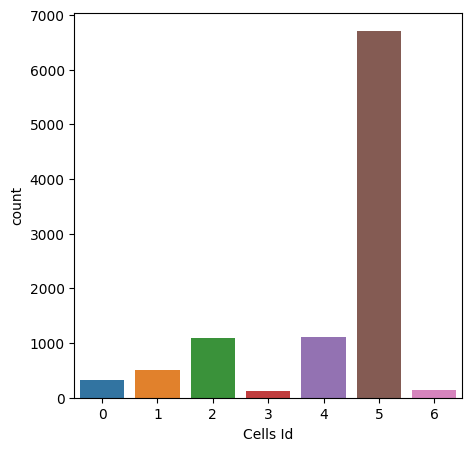

In [20]:
plt.figure(figsize = (5,5))
sns.countplot(data = cancer_data , x = "Cells Id")


In [21]:
cancer_data["Type of cells"].value_counts()

Melanocytic nevi                  6705
dermatofibroma                    1113
Benign keratosis-like lesions     1099
Basal cell carcinoma               514
Actinic keratoses                  327
Vascular lesions                   142
Dermatofibroma                     115
Name: Type of cells, dtype: int64

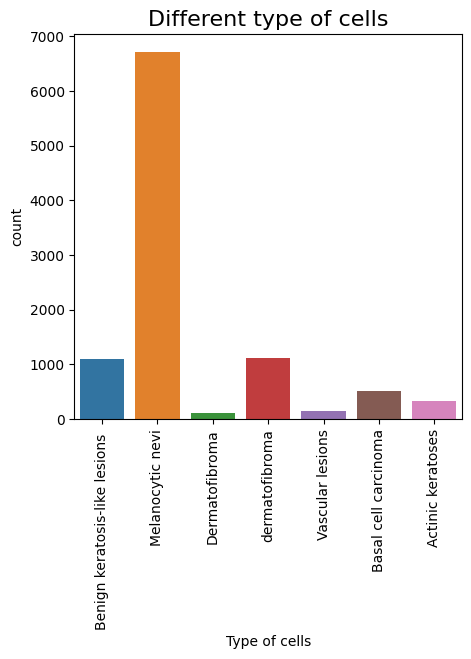

In [22]:
plt.figure(figsize = (5,5))
sns.countplot(data = cancer_data , x = "Type of cells");
plt.xticks(rotation = 90)
plt.title('Different type of cells', size=16);

B) Pie Chart: The pie chart represents the distribution of patient gender, providing a visual understanding of the gender composition in the dataset.

In [23]:
cancer_data["sex"].value_counts()

male       5406
female     4552
unknown      57
Name: sex, dtype: int64

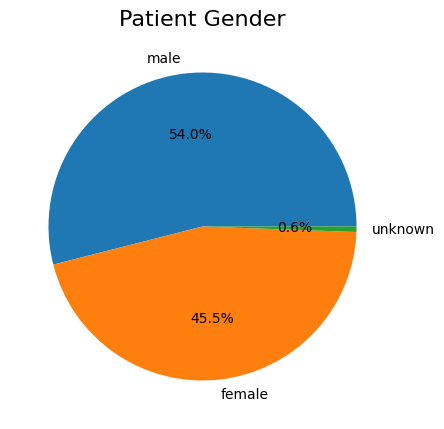

In [24]:
plt.figure(figsize = (5,5))
plt.pie(cancer_data['sex'].value_counts(), labels = cancer_data['sex'].value_counts().index, autopct="%.1f%%")
plt.title('Patient Gender', size=16);

C) Histogram: The histogram displays the distribution of ages in the dataset, allowing the analysis of the age ranges of patients included in the dataset.

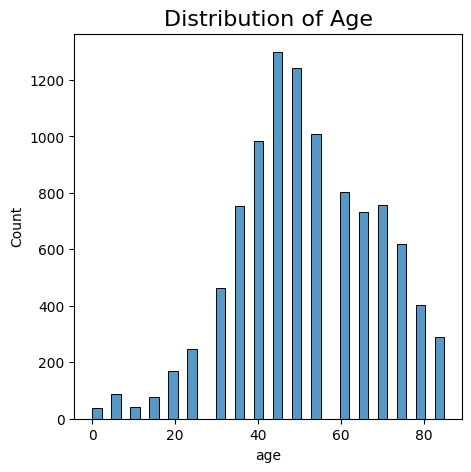

In [25]:
plt.figure(figsize = (5,5))
sns.histplot(cancer_data['age'])
plt.title('Distribution of Age', size=16);

D) Bar Plot: The bar plot illustrates the location of the disease over gender, providing insights into the relationship between disease localization and gender. It showcases the frequency of different disease locations based on gender.

In [26]:
cancer_data["localization"].to_frame()

,localization
0,scalp
1,scalp
2,scalp
3,scalp
4,ear
...,...
10010,abdomen
10011,abdomen
10012,abdomen
10013,face


In [27]:
cancer_data["localization"].value_counts()

back               2192
lower extremity    2077
trunk              1404
upper extremity    1118
abdomen            1022
face                745
chest               407
foot                319
unknown             234
neck                168
scalp               128
hand                 90
ear                  56
genital              48
acral                 7
Name: localization, dtype: int64

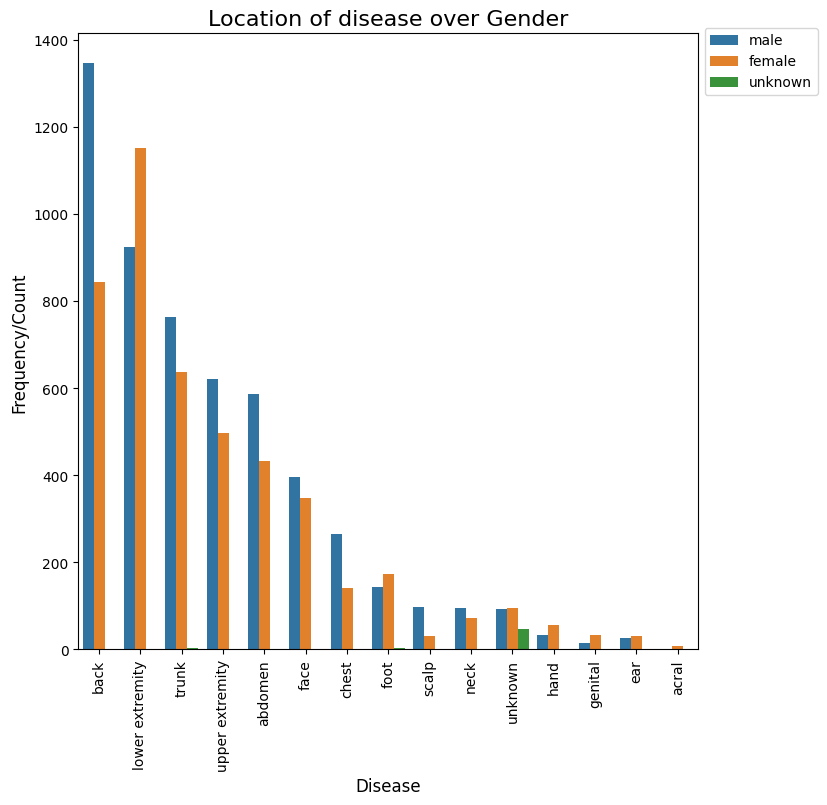

In [28]:
value = cancer_data[['localization', 'sex']].value_counts().to_frame()
value.reset_index(level=[1,0 ], inplace=True)
temp = value.rename(columns = {'localization':'location', 0: 'count'})

plt.figure(figsize = (8,8))
sns.barplot(x = 'location',  y='count', hue = 'sex', data = temp)
plt.title('Location of disease over Gender', size = 16)
plt.xlabel('Disease', size=12)
plt.ylabel('Frequency/Count', size=12)
plt.xticks(rotation = 90)
plt.legend(loc = (1.01 , 0.9));

**These visualizations enable researchers and analysts to explore patterns, trends, and distributions within the dataset. They serve as a preliminary analysis step to gain a better understanding of the data and inform further analysis and modeling for skin cancer detection.**

# Step 4 : Importing new data for visualising the diseases

In [29]:
image_data = pd.read_csv("drive/MyDrive/hmnist_28_28_RGB.csv")
image_data

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,183,165,181,182,165,180,184,166,182,188,...,208,185,187,208,186,186,206,187,189,0
10011,2,3,1,38,33,32,121,104,103,132,...,96,79,76,24,23,21,3,4,1,0
10012,132,118,118,167,149,149,175,156,160,184,...,204,181,178,181,159,153,172,151,145,0
10013,160,124,146,164,131,152,167,127,146,169,...,185,162,167,184,157,166,185,162,172,0


In [30]:
rescale_image = image_data/255
rescale_image

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,0.752941,0.600000,0.756863,0.764706,0.607843,0.752941,0.772549,0.603922,0.725490,0.792157,...,0.678431,0.486275,0.541176,0.717647,0.576471,0.650980,0.725490,0.603922,0.694118,0.007843
1,0.098039,0.054902,0.117647,0.266667,0.188235,0.294118,0.482353,0.364706,0.494118,0.619608,...,0.235294,0.152941,0.215686,0.098039,0.054902,0.109804,0.098039,0.054902,0.105882,0.007843
2,0.752941,0.541176,0.600000,0.784314,0.568627,0.639216,0.788235,0.556863,0.627451,0.807843,...,0.654902,0.505882,0.560784,0.623529,0.486275,0.556863,0.533333,0.407843,0.458824,0.007843
3,0.149020,0.074510,0.117647,0.372549,0.231373,0.282353,0.560784,0.403922,0.466667,0.670588,...,0.172549,0.101961,0.141176,0.098039,0.047059,0.066667,0.098039,0.047059,0.058824,0.007843
4,0.619608,0.443137,0.545098,0.760784,0.564706,0.682353,0.843137,0.635294,0.749020,0.882353,...,0.819608,0.650980,0.725490,0.674510,0.529412,0.584314,0.427451,0.305882,0.360784,0.007843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,0.717647,0.647059,0.709804,0.713725,0.647059,0.705882,0.721569,0.650980,0.713725,0.737255,...,0.815686,0.725490,0.733333,0.815686,0.729412,0.729412,0.807843,0.733333,0.741176,0.000000
10011,0.007843,0.011765,0.003922,0.149020,0.129412,0.125490,0.474510,0.407843,0.403922,0.517647,...,0.376471,0.309804,0.298039,0.094118,0.090196,0.082353,0.011765,0.015686,0.003922,0.000000
10012,0.517647,0.462745,0.462745,0.654902,0.584314,0.584314,0.686275,0.611765,0.627451,0.721569,...,0.800000,0.709804,0.698039,0.709804,0.623529,0.600000,0.674510,0.592157,0.568627,0.000000
10013,0.627451,0.486275,0.572549,0.643137,0.513725,0.596078,0.654902,0.498039,0.572549,0.662745,...,0.725490,0.635294,0.654902,0.721569,0.615686,0.650980,0.725490,0.635294,0.674510,0.000000


In [31]:
rescale_image.shape

(10015, 2353)

In [32]:
rescale_image.iloc[1 , :2351]

pixel0000    0.098039
pixel0001    0.054902
pixel0002    0.117647
pixel0003    0.266667
pixel0004    0.188235
               ...   
pixel2346    0.098039
pixel2347    0.054902
pixel2348    0.109804
pixel2349    0.098039
pixel2350    0.054902
Name: 1, Length: 2351, dtype: float64

In [33]:
rescale_image.iloc[1 , :2351].shape

(2351,)

In [34]:
rescale_image.iloc[1 , :2351].values

array([0.09803922, 0.05490196, 0.11764706, ..., 0.10980392, 0.09803922,
       0.05490196])

In [35]:
rescale_image.iloc[1, :2352].values.reshape(28,28,3)

array([[[0.09803922, 0.05490196, 0.11764706],
        [0.26666667, 0.18823529, 0.29411765],
        [0.48235294, 0.36470588, 0.49411765],
        ...,
        [0.48235294, 0.36078431, 0.38823529],
        [0.30980392, 0.20784314, 0.29019608],
        [0.23137255, 0.14509804, 0.24313725]],

       [[0.16470588, 0.10980392, 0.19215686],
        [0.38039216, 0.2745098 , 0.38039216],
        [0.56470588, 0.43529412, 0.56862745],
        ...,
        [0.55294118, 0.42352941, 0.43137255],
        [0.38431373, 0.27058824, 0.30588235],
        [0.24705882, 0.15686275, 0.24705882]],

       [[0.2627451 , 0.18431373, 0.27058824],
        [0.4745098 , 0.34901961, 0.43529412],
        [0.62745098, 0.47058824, 0.60784314],
        ...,
        [0.62745098, 0.49411765, 0.5372549 ],
        [0.47843137, 0.36862745, 0.4       ],
        [0.30196078, 0.21176471, 0.29019608]],

       ...,

       [[0.24705882, 0.15686275, 0.25882353],
        [0.38039216, 0.26666667, 0.36470588],
        [0.55294118, 0

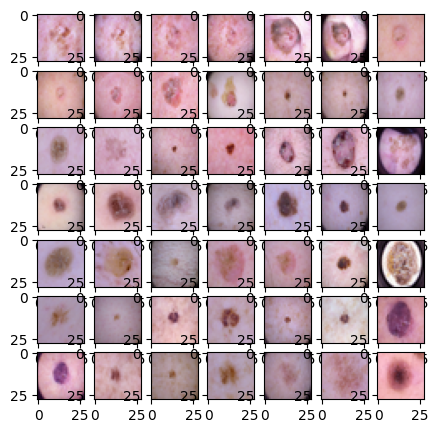

In [36]:
plt.figure(figsize = (5,5))
for i in range(49):
    plt.subplot(7,7 , i+1)
    plt.imshow(rescale_image.iloc[i, :2352].values.reshape(28,28,3));

In [37]:
cancer_data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,Type of cells,path,Cells Id
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions,drive/MyDrive/data_ham10000/HAM10000_images_pa...,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions,drive/MyDrive/data_ham10000/HAM10000_images_pa...,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions,drive/MyDrive/data_ham10000/HAM10000_images_pa...,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions,drive/MyDrive/data_ham10000/HAM10000_images_pa...,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,Benign keratosis-like lesions,drive/MyDrive/data_ham10000/HAM10000_images_pa...,2


In [38]:
lambda x: np.asarray(Image.open(x).resize((100,100)))

<function __main__.<lambda>(x)>

This code preprocesses the images in the dataset by opening each image, resizing it to a size of (100,100) pixels, and converting it into a NumPy array. This line utilizes the Image module from the PIL (Python Imaging Library) library to open and resize the images.

In [39]:
cancer_data['image'] = cancer_data['path'].map(lambda x: np.asarray(Image.open(x).resize((100,100))))
cancer_data['image'].map(lambda x: x.shape).value_counts()

(100, 100, 3)    10015
Name: image, dtype: int64

# Step 5 : Splitting data into Independent(X) and Dependent(y)

In [40]:
X = cancer_data.drop("Cells Id"  ,axis = 1)
X.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,Type of cells,path,image
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions,drive/MyDrive/data_ham10000/HAM10000_images_pa...,"[[[190, 153, 195], [192, 155, 197], [191, 153,..."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions,drive/MyDrive/data_ham10000/HAM10000_images_pa...,"[[[24, 13, 22], [24, 14, 24], [25, 14, 28], [3..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions,drive/MyDrive/data_ham10000/HAM10000_images_pa...,"[[[186, 128, 137], [190, 134, 148], [194, 137,..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions,drive/MyDrive/data_ham10000/HAM10000_images_pa...,"[[[24, 11, 17], [25, 12, 22], [36, 21, 30], [5..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,Benign keratosis-like lesions,drive/MyDrive/data_ham10000/HAM10000_images_pa...,"[[[132, 89, 112], [146, 101, 124], [158, 114, ..."


In [41]:
X["image"].head()

0    [[[190, 153, 195], [192, 155, 197], [191, 153,...
1    [[[24, 13, 22], [24, 14, 24], [25, 14, 28], [3...
2    [[[186, 128, 137], [190, 134, 148], [194, 137,...
3    [[[24, 11, 17], [25, 12, 22], [36, 21, 30], [5...
4    [[[132, 89, 112], [146, 101, 124], [158, 114, ...
Name: image, dtype: object

In [42]:
y = cancer_data["Cells Id"]
y.head()

0    2
1    2
2    2
3    2
4    2
Name: Cells Id, dtype: int8

Splitting the data into training and testing set

In [43]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train , y_test  = train_test_split(X, y, test_size = 0.2 , random_state = 42)
len(X_train) , len(X_test) , len(y_train) , len(y_test)

(8012, 2003, 8012, 2003)

In [44]:
X_train = np.asarray(X_train['image'].tolist())
X_test = np.asarray(X_test['image'].tolist())

In [45]:
X_train = (X_train - np.mean(X_train))/np.std(X_train)
X_test = (X_test - np.mean(X_test))/np.std(X_test)

In [46]:
X_train

array([[[[ 1.48689184e+00, -1.90206591e-01,  2.61319910e-01],
         [ 1.48689184e+00, -2.11707853e-01,  2.39818648e-01],
         [ 1.55139563e+00, -2.33209114e-01,  2.39818648e-01],
         ...,
         [ 1.63740067e+00, -1.25702805e-01,  2.82821172e-01],
         [ 1.70190446e+00,  3.30476668e-03,  3.68826219e-01],
         [ 1.63740067e+00,  3.30476668e-03,  3.68826219e-01]],

        [[ 1.50839310e+00, -2.11707853e-01,  2.18317386e-01],
         [ 1.52989436e+00, -1.90206591e-01,  2.39818648e-01],
         [ 1.52989436e+00, -2.33209114e-01,  1.96816124e-01],
         ...,
         [ 1.59439815e+00, -1.25702805e-01,  2.61319910e-01],
         [ 1.57289689e+00, -1.04201543e-01,  2.39818648e-01],
         [ 1.61589941e+00, -6.11990191e-02,  3.25823696e-01]],

        [[ 1.48689184e+00, -1.90206591e-01,  2.18317386e-01],
         [ 1.50839310e+00, -2.11707853e-01,  1.75314862e-01],
         [ 1.48689184e+00, -3.19214162e-01,  4.63072905e-02],
         ...,
         [ 1.55139563e+0

In [47]:
X_train.shape

(8012, 100, 100, 3)

In [48]:
X_test.shape

(2003, 100, 100, 3)

In [49]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [50]:
y_test.shape

(2003, 7)

# Step 6 : Model Building

In [51]:
EarlyStop = keras.callbacks.EarlyStopping(
               min_delta = 0.001,
               patience = 10 ,
               verbose = 0
)

In [52]:
from keras.utils import to_categorical
from keras.layers import Dense , Dropout , Flatten, Conv2D, MaxPool2D , BatchNormalization , LSTM , Input
from keras.models import Model , Sequential

In [53]:
model = Sequential()

# [+] 1st convolutional layer
model.add(Conv2D(filters = 96,
                kernel_size = (11, 11),
                strides = (4, 4),
                activation = 'relu',
                input_shape = (100, 100, 3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (3, 3), strides = (2, 2)))

# [+] 2nd convolutional layer
model.add(Conv2D(filters = 256,
                kernel_size=(5, 5),
                strides=(1, 1),
                activation = 'relu',
                padding = "same"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (3, 3), strides = (2, 2)))

# [+] 3rd convolutional layer
model.add(Conv2D(filters = 384,
                 kernel_size=(3,3),
                 strides=(1,1),
                 activation='relu',
                 padding="same"))
model.add(BatchNormalization())

# [+] 4th convolutional layer
model.add(Conv2D(filters = 384,
                kernel_size = (1, 1),
                strides = (1, 1),
                activation = 'relu',
                padding = "same"))
model.add(BatchNormalization())

# [+] 5th convolutional layer
model.add(Conv2D(filters = 256,
                kernel_size = (1, 1),
                strides = (1, 1),
                activation = 'relu',
                padding = "same"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (3, 3), strides = (2, 2)))



model.add(Flatten())  # [+] Convert the Conv2D objects into one List.

# [+] 6th, Dense layer:
# From the Docs:
# A Dense layer feeds all outputs from the previous layer to all its neurons,
# each neuron providing one output to the next layer.
# source: www.stackoverflow.com
model.add(Dense(4096, activation = 'relu'))
model.add(Dropout(0.5))

# [+] 7th Dense layer
model.add(Dense(4096, activation = 'relu'))
model.add(Dropout(0.5))

# [+] 8th output layer
model.add(Dense(7, activation = 'softmax'))

In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 23, 23, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 23, 23, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 11, 11, 256)      1024      
 hNormalization)                                                 
                                                        

In [55]:
model.compile(loss = "categorical_crossentropy" , optimizer = "adam" , metrics = ["accuracy"])

epochs = 50
batch_size = 32

T = model.fit(X_train , y_train , epochs = epochs,
                    batch_size=batch_size,
                    callbacks = [EarlyStop] ,
                    validation_data = (X_test, y_test))

Epoch 1/50
251/251 [==============================] - 22s 24ms/step - loss: 1.2318 - accuracy: 0.6604 - val_loss: 0.9067 - val_accuracy: 0.6845
Epoch 2/50
251/251 [==============================] - 5s 19ms/step - loss: 0.9062 - accuracy: 0.6870 - val_loss: 0.8508 - val_accuracy: 0.6920
Epoch 3/50
251/251 [==============================] - 4s 17ms/step - loss: 0.8743 - accuracy: 0.6966 - val_loss: 0.8756 - val_accuracy: 0.7004
Epoch 4/50
251/251 [==============================] - 4s 18ms/step - loss: 0.8617 - accuracy: 0.6990 - val_loss: 0.8694 - val_accuracy: 0.6865
Epoch 5/50
251/251 [==============================] - 5s 18ms/step - loss: 0.8287 - accuracy: 0.7127 - val_loss: 0.9864 - val_accuracy: 0.5517
Epoch 6/50
251/251 [==============================] - 4s 18ms/step - loss: 0.7753 - accuracy: 0.7314 - val_loss: 0.8105 - val_accuracy: 0.7129
Epoch 7/50
251/251 [==============================] - 5s 18ms/step - loss: 0.7785 - accuracy: 0.7293 - val_loss: 0.7425 - val_accuracy: 0.729

# Step 7 : Model Evaluation

In [56]:
loss_accuracy = model.evaluate(X_test , y_test)
print("Accuracy : " , loss_accuracy[1]*100)
print("Loss : " , loss_accuracy[0])

63/63 [==============================] - 0s 7ms/step - loss: 0.7074 - accuracy: 0.7579
Accuracy :  75.78632235527039
Loss :  0.7073916792869568


In [57]:
epochs = np.arange(len(T.history["accuracy"]))
epochs

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22])

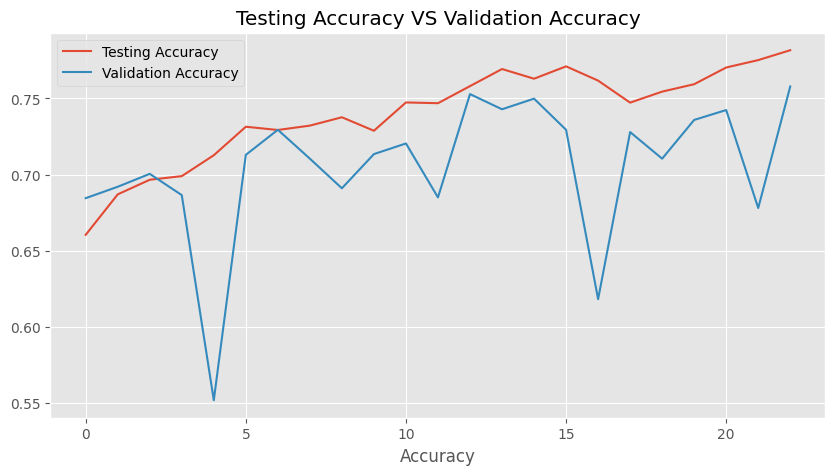

In [58]:
plt.figure(figsize = (10,5))
plt.style.use("ggplot")
plt.plot(epochs , T.history["accuracy"] , label = "Testing Accuracy")
plt.plot(epochs , T.history["val_accuracy"] , label = "Validation Accuracy")
plt.xlabel("Epochs")
plt.xlabel("Accuracy")
plt.title("Testing Accuracy VS Validation Accuracy")
plt.legend()
plt.show()

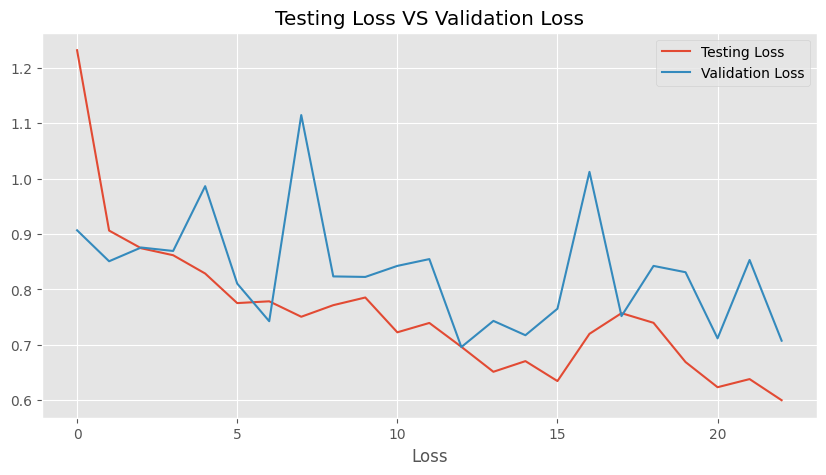

In [59]:
plt.figure(figsize = (10,5))
plt.style.use("ggplot")
plt.plot(epochs , T.history["loss"] , label = "Testing Loss")
plt.plot(epochs , T.history["val_loss"] , label = "Validation Loss")
plt.xlabel("Epochs")
plt.xlabel("Loss")
plt.title("Testing Loss VS Validation Loss")
plt.legend()
plt.show()

# Step 8 : Model Prediction

In [60]:
model_prediction = model.predict(X_test)

63/63 [==============================] - 0s 5ms/step


In [61]:
print(model_prediction[0])
print(model_prediction[0].max())
print(model_prediction[0].argmax())

[8.9065349e-03 6.8671973e-03 5.5315101e-01 1.0019174e-03 2.7588263e-01
 1.5416004e-01 3.0615705e-05]
0.553151
2


In [62]:
model_prediction.shape

(2003, 7)

In [63]:
model_prediction = np.argmax(model_prediction , axis = 1)

In [64]:
print(model_prediction[0])
print(model_prediction[0].max())
print(model_prediction[0].argmax())

2
2
0


In [65]:
model_prediction

array([2, 5, 0, ..., 5, 5, 5])

In [66]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [67]:
y_test = np.argmax(y_test , axis = 1)
y_test

array([4, 5, 4, ..., 4, 4, 5])

In [68]:
from sklearn.metrics import accuracy_score , precision_recall_fscore_support , classification_report

In [69]:
def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  -----
  y_true = true labels in the form of a 1D array
  y_pred = predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [70]:
model_result = calculate_results(y_test , model_prediction)
model_result

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 75.78632051922118,
 'precision': 0.7345591617716857,
 'recall': 0.7578632051922117,
 'f1': 0.7363810354512357}

# Step 9 : Visualizing Our Output

Actual Label : 2
Predicted Label : 2
Cancer Disease Name : Melanocytic nevi 


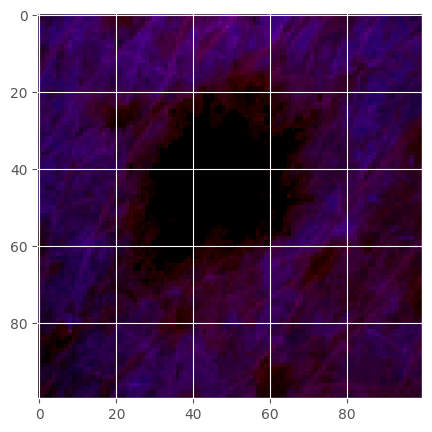

In [71]:
plt.figure(figsize = (5,5))
plt.imshow(X_test[60] , "gray")
print(f"Actual Label : {y_test[60]}")
print(f"Predicted Label : {model_prediction[0]}")
if model_prediction[10] == 0:
  print("Cancer Disease Name : Actinic keratoses ")
elif model_prediction[10] == 1:
  print("Cancer Disease Name : Basal cell carcinoma")
elif model_prediction[10] == 2:
  print("Cancer Disease Name : Benign keratosis-like lesions")
elif model_prediction[10] == 3:
  print("Cancer Disease Name : Dermatofibroma")
elif model_prediction[10] == 4:
  print("Cancer Disease Name : dermatofibroma ")
elif model_prediction[10] == 5:
  print("Cancer Disease Name : Melanocytic nevi ")
else:
  print("Cancer Disease Name : Vascular lesions ")

Actual Label : 0
Predicted Label : 0
Cancer Disease Name : Melanocytic nevi 


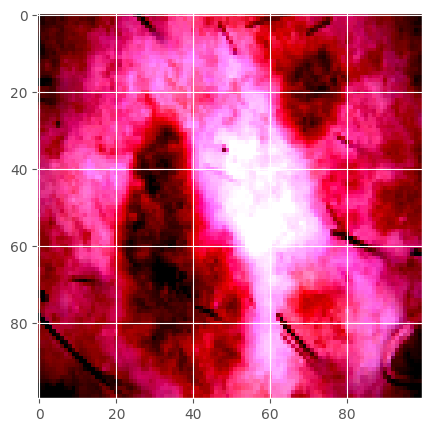

In [72]:
plt.figure(figsize = (5,5))
plt.imshow(X_test[100] , "gray")
print(f"Actual Label : {y_test[100]}")
print(f"Predicted Label : {model_prediction[100]}")
if model_prediction[10] == 0:
  print("Cancer Disease Name : Actinic keratoses ")
elif model_prediction[10] == 1:
  print("Cancer Disease Name : Basal cell carcinoma")
elif model_prediction[10] == 2:
  print("Cancer Disease Name : Benign keratosis-like lesions")
elif model_prediction[10] == 3:
  print("Cancer Disease Name : Dermatofibroma")
elif model_prediction[10] == 4:
  print("Cancer Disease Name : dermatofibroma ")
elif model_prediction[10] == 5:
  print("Cancer Disease Name : Melanocytic nevi ")
else:
  print("Cancer Disease Name : Vascular lesions ")

Actual Label : 1
Predicted Label : 1
Cancer Disease Name : Melanocytic nevi 


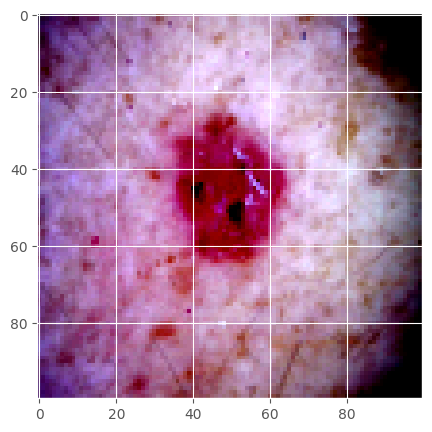

In [73]:
plt.figure(figsize = (5,5))
plt.imshow(X_test[1000] , "gray")
print(f"Actual Label : {y_test[1000]}")
print(f"Predicted Label : {model_prediction[1000]}")
if model_prediction[10] == 0:
  print("Cancer Disease Name : Actinic keratoses ")
elif model_prediction[10] == 1:
  print("Cancer Disease Name : Basal cell carcinoma")
elif model_prediction[10] == 2:
  print("Cancer Disease Name : Benign keratosis-like lesions")
elif model_prediction[10] == 3:
  print("Cancer Disease Name : Dermatofibroma")
elif model_prediction[10] == 4:
  print("Cancer Disease Name : dermatofibroma ")
elif model_prediction[10] == 5:
  print("Cancer Disease Name : Melanocytic nevi ")
else:
  print("Cancer Disease Name : Vascular lesions ")